In [34]:
import pandas as pd
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
df.loc[99]

PassengerId                  100
Survived                       0
Pclass                         2
Name           Kantor, Mr. Sinai
Sex                         male
Age                         34.0
SibSp                          1
Parch                          0
Ticket                    244367
Fare                        26.0
Cabin                        NaN
Embarked                       S
Name: 99, dtype: object

In [5]:
df.tail(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


In [6]:
df.loc[5, "Age"] = 28

In [7]:
count = 0
for person in df["Age"]:
    if person > 18:
        count = count + 1
count

576

In [8]:
count = (df["Age"] > 18).sum()

In [9]:
count = 0
for person in df["Sex"]:
    if person == "male":
        count = count + 1
count = (count / len(df)) * 100
count

print((df[df['Sex'] == 'male'].shape[0]/len(df))*100)

64.75869809203144


In [10]:
classes = {"CLASS":[], "Frequency":[]}
countFirst = 0
countSecond = 0
countThird = 0
for ticket in df["Pclass"]:
    if ticket == 1:
        countFirst = countFirst + 1
    elif ticket == 2:
        countSecond = countSecond + 1
    elif ticket == 3:
        countThird = countThird + 1
classes["CLASS"].append("First")
classes["CLASS"].append("Second")
classes["CLASS"].append("Third")
classes["Frequency"].append(countFirst)
classes["Frequency"].append(countSecond)
classes["Frequency"].append(countThird)
classes

{'CLASS': ['First', 'Second', 'Third'], 'Frequency': [216, 184, 491]}

In [11]:
freqTable = pd.DataFrame(classes)

In [12]:
freqTable["Percent"] = (freqTable["Frequency"] / len(df))*100

In [13]:
freqTable.head()

,CLASS,Frequency,Percent
0,First,216,24.242424
1,Second,184,20.650954
2,Third,491,55.106622


In [14]:
df[df['PassengerId'] == 528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [15]:
idx = 0
for person in df["Name"]:
    if "Fannie" in person:
        break
    idx += 1
df.loc[idx]

PassengerId                              707
Survived                                   1
Pclass                                     2
Name           Kelly, Mrs. Florence "Fannie"
Sex                                   female
Age                                     45.0
SibSp                                      0
Parch                                      0
Ticket                                223596
Fare                                    13.5
Cabin                                    NaN
Embarked                                   S
Name: 706, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaleDied = 0
for idx in range(len(df)):
    if df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 0:
        maleDied += 1
    elif df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 1:
        maleSurvive += 1
    elif df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 0:
        femaleDied += 1
    elif df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 1:
        femaleSurvive += 1
conTable = pd.DataFrame({
    "Male": [maleSurvive, maleDied],
    "Female": [femaleSurvive, femaleDied]
})
conTable.index = ["Survived", "Died"]
conTable.head()

,Male,Female
Survived,109,233
Died,468,81


In [18]:
childSurvive = 0
childDied = 0
adultSurvive = 0
adultDied = 0
elderSurvive = 0
elderDied = 0
childTotal = 0
adultTotal = 0
elderTotal = 0
allPeople = 0
allPeopleSurvive = 0
allPeopleDied = 0
for idx in range(len(df)):
    if df.loc[idx]["Age"] < 18 and df.loc[idx]["Survived"] == 1:
        childSurvive += 1
        childTotal += 1
        allPeople += 1
        allPeopleSurvive += 1
    elif df.loc[idx]['Age'] < 18 and df.loc[idx]["Survived"] == 0:
        childDied += 1
        childTotal += 1
        allPeople += 1
        allPeopleDied += 1
    elif df.loc[idx]["Age"] >= 18 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 1:
        adultSurvive += 1
        adultTotal += 1
        allPeople += 1
        allPeopleSurvive += 1
    elif df.loc[idx]["Age"] >= 18 and df.loc[idx]["Age"] < 60 and df.loc[idx]["Survived"] == 0:
        adultDied += 1
        adultTotal += 1
        allPeople += 1
        allPeopleDied += 1
    elif df.loc[idx]['Age'] >= 60 and df.loc[idx]["Survived"] == 1:
        elderSurvive += 1
        elderTotal += 1
        allPeople += 1
        allPeopleSurvive += 1
    elif df.loc[idx]['Age'] >= 60 and df.loc[idx]["Survived"] == 0:
        elderDied += 1
        elderTotal += 1
        allPeople += 1
        allPeopleDied += 1

conTable = {
    "Child": [childSurvive/childTotal *100, childDied/childTotal *100],
    "Adult": [adultSurvive/adultTotal *100, adultDied/adultTotal *100],
    "Elderly": [elderSurvive/elderTotal *100, elderDied/elderTotal *100],
    "Total": [allPeopleSurvive/allPeople *100, allPeopleDied/allPeople*100]
}
df2 = pd.DataFrame(conTable)
df2.index = ["Survived", "Died"]
df2.head()

,Child,Adult,Elderly,Total
Survived,53.982301,38.541667,26.923077,40.559441
Died,46.017699,61.458333,73.076923,59.440559


In [29]:
survived = {"S": 0, "C": 0, "Q": 0, "U": 0}
died = {"S": 0, "C": 0, "Q": 0, "U": 0}
for idx in range(len(df)):
    city = df.loc[idx]["Embarked"]
    if df.loc[idx]["Survived"] == 1:
        if city in ["S", "C", "Q"]:
            survived[city] += 1
        else:
            survived["U"] += 1
    else:
        if city in ["S", "C", "Q"]:
            died[city] += 1
        else:
            died["U"] += 1
conTable = {
    "S": [survived["S"]/(survived["S"] + died["S"]) * 100, died["S"], survived["S"] + died["S"]],
    "Q": [survived["Q"], died["Q"], survived["Q"] + died["Q"]],
    "C": [survived["C"], died["C"], survived["C"] + died["C"]],
    "U": [survived["U"], died["U"], survived["U"] + died["U"]],
    "Total": [survived["S"] + survived["Q"] + survived["C"] + survived["U"],died["S"] + died["Q"] + died["C"] + died["U"],len(df)]
}
conTable = pd.DataFrame(conTable)
conTable.index = ["Survived", "Died", "Total"]
conTable.head()

,S,Q,C,U,Total
Survived,33.695652,30,93,2,342
Died,427.000000,47,75,0,549
Total,644.000000,77,168,2,891


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          715 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
passengerClasses = {"First": 0, "Second": 0, "Third": 0}
for passenger in df["Pclass"]:
    if passenger == 1:
        passengerClasses["First"] += 1
    elif passenger == 2:
        passengerClasses["Second"] += 1
    elif passenger == 3:
        passengerClasses["Third"] += 1
percentClasses = {"First": (passengerClasses["First"]/len(df))*100,
                 "Second": (passengerClasses["Second"]/len(df)*100),
                 "Third": (passengerClasses["Third"]/len(df)*100)
                 }
freqTable = {
    "Classes": ["First", "Second", "Third"],
    "Percent": [percentClasses["First"], 
                percentClasses["Second"],
                

In [33]:
percentClasses["Third"]]
}
freqTable = pd.DataFrame(freqTable)
freqTable.head()

,Classes,Percent
0,First,24.242424
1,Second,20.650954
2,Third,55.106622


<AxesSubplot:xlabel='Classes', ylabel='Percent'>

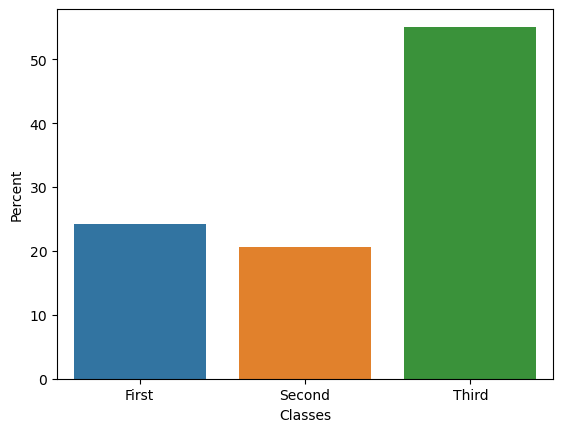

In [35]:
sns.barplot(data=freqTable, x="Classes", y="Percent")